In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("alturas_pesos.csv")

df

,sexo,altura,peso
0,M,187.57,109.72
1,M,174.71,73.62
2,M,188.24,96.50
3,M,182.20,99.81
4,M,177.50,93.60
...,...,...,...
9995,F,168.08,62.04
9996,F,170.35,77.51
9997,F,162.22,58.28
9998,F,175.35,74.32


In [3]:
df["sexo"].value_counts()

sexo
M    5000
F    5000
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sexo    10000 non-null  object 
 1   altura  10000 non-null  float64
 2   peso    10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
# estatisticas descritivas

df.describe()

,altura,peso
count,10000.000000,10000.000000
mean,168.573573,73.228860
std,9.772756,14.564286
min,137.830000,29.350000
25%,161.300000,61.610000
50%,168.450000,73.125000
75%,175.702500,84.902500
max,200.660000,122.470000


<Axes: xlabel='altura', ylabel='Count'>

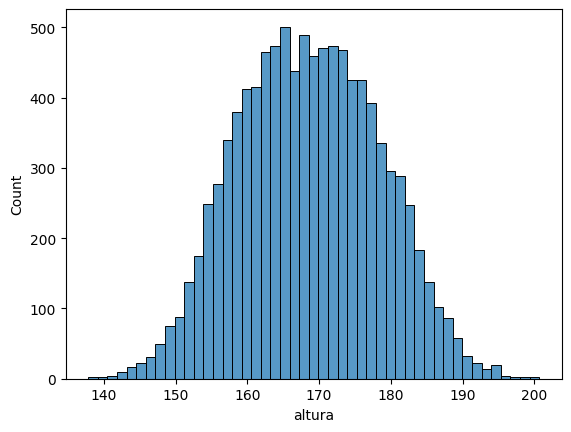

In [6]:
sns.histplot(data=df, x="altura")

<Axes: xlabel='peso', ylabel='Count'>

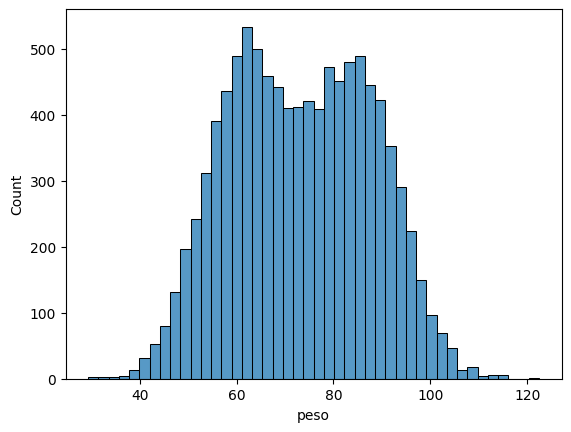

In [7]:
sns.histplot(data=df, x="peso")

<Axes: xlabel='peso', ylabel='Count'>

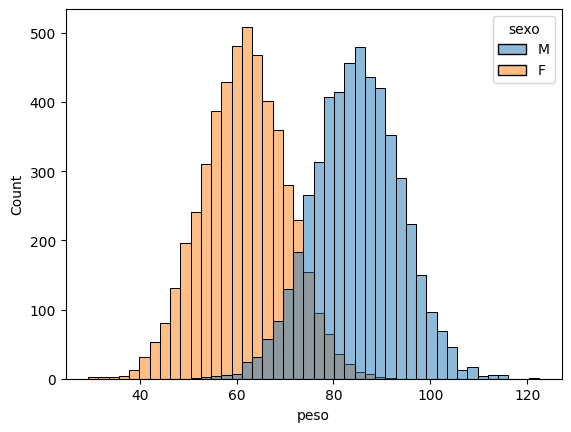

In [8]:
sns.histplot(data=df, x="peso", hue="sexo")

<Axes: xlabel='altura', ylabel='Count'>

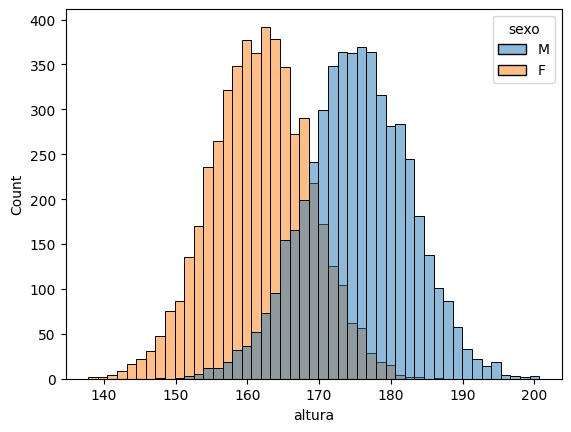

In [9]:
sns.histplot(data=df, x="altura", hue="sexo")

In [13]:
dados = {
    "F" : df.query("sexo == 'F'").copy(),
    "M" : df.query("sexo == 'M'").copy()
}

In [12]:
dados["F"]

,sexo,altura,peso
5000,F,149.63,46.31
5001,F,165.68,64.10
5002,F,160.96,59.44
5003,F,163.78,58.14
5004,F,156.95,58.87
...,...,...,...
9995,F,168.08,62.04
9996,F,170.35,77.51
9997,F,162.22,58.28
9998,F,175.35,74.32


In [13]:
# medidas de posição

# media

df["altura"].mean()

168.573573

In [16]:
df.groupby("sexo")[["altura", "peso"]].mean()

,altura,peso
sexo,,
F,161.820188,61.625692
M,175.326958,84.832028


In [17]:
# mediana

df.groupby("sexo")[["altura", "peso"]].median()

,altura,peso
sexo,,
F,161.88,61.74
M,175.33,84.84


In [18]:
df.groupby("sexo")[["altura", "peso"]].agg(["median", "mean"])

altura               peso           
      median        mean median       mean
sexo                                      
F     161.88  161.820188  61.74  61.625692
M     175.33  175.326958  84.84  84.832028

In [20]:
# quartis

q1 = np.quantile(df["altura"], q=0.25)
q2 = np.quantile(df["altura"], q=0.50)
q3 = np.quantile(df["altura"], q=0.75)

print(q1, q2, q3)

161.3 168.45 175.7025


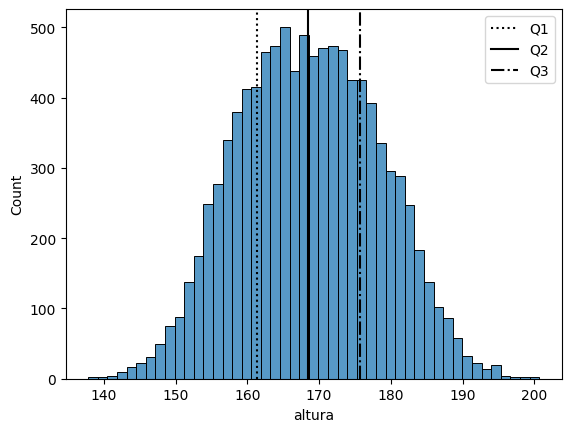

In [21]:
sns.histplot(data=df, x="altura")

q1 = np.quantile(df["altura"], q=0.25)
q2 = np.quantile(df["altura"], q=0.50)
q3 = np.quantile(df["altura"], q=0.75)

plt.axvline(x=q1, label="Q1", color="k", ls=":")
plt.axvline(x=q2, label="Q2", color="k")
plt.axvline(x=q3, label="Q3", color="k", ls="-.")

plt.legend()
plt.show()

In [22]:
# moda

df["altura"].mode()

0    160.48
1    164.67
2    164.73
3    169.01
4    172.16
Name: altura, dtype: float64

In [23]:
df["altura_m"] = np.round(df["altura"]/100, 2)

In [24]:
df["altura_m"].value_counts()

altura_m
1.64    371
1.62    364
1.71    362
1.65    362
1.73    360
       ... 
1.40      1
1.98      1
2.00      1
2.01      1
1.38      1
Name: count, Length: 64, dtype: int64

In [25]:
df["altura_m"].mode()

0    1.64
Name: altura_m, dtype: float64

In [26]:
# medidas de dispersão

# amplitude

df.describe().loc["min max".split()]

,altura,peso,altura_m
min,137.83,29.35,1.38
max,200.66,122.47,2.01


In [27]:
df["altura"].max() - df["altura"].min()  # amplitude

62.829999999999984

In [3]:
# variância
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("alturas_pesos.csv")

df

for col in df.select_dtypes(include=np.number):

    print(f"Variância da variavel {col}: {(df[col].var()):.2f}")

Variância da variavel altura: 95.51
Variância da variavel peso: 212.12


In [4]:
# desvio padrão std

for col in df.select_dtypes(include=np.number):

    print(f"Desvio padrão da variavel {col}: {(df[col].std()):.2f}")

Desvio padrão da variavel altura: 9.77
Desvio padrão da variavel peso: 14.56


In [ ]:
# intervalo interquatilico iqr

iqr = q1 - q3

<Axes: xlabel='altura', ylabel='Count'>

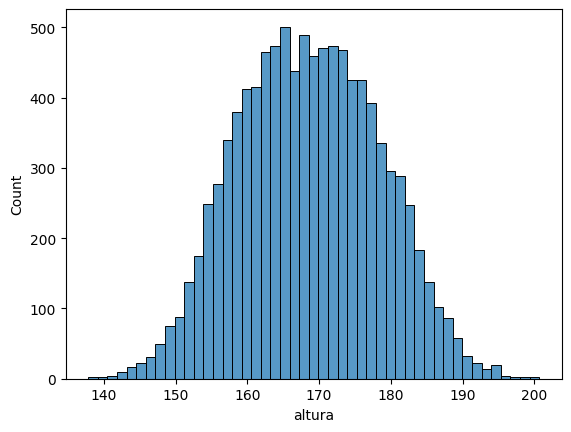

In [8]:
sns.histplot(data=df, x="altura")

In [7]:
# assimetria skewness

df["altura"].skew()

0.04937008717355795

<Axes: xlabel='altura'>

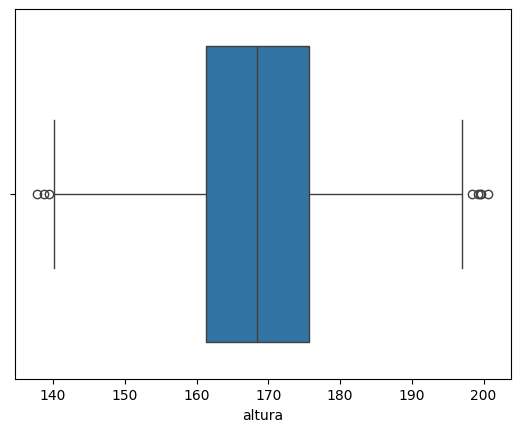

In [9]:
# boxplot

sns.boxplot(data=df, x="altura")

In [22]:
# outliers

# z-score desvio padrão

dados["F"]["z_score_altura"] = dados["F"]["altura"]

altura_f

5000    149.63
5001    165.68
5002    160.96
5003    163.78
5004    156.95
         ...  
9995    168.08
9996    170.35
9997    162.22
9998    175.35
9999    157.34
Name: altura, Length: 5000, dtype: float64

In [21]:
dados["F"]["altura"].apply(lambda x: (x-dados["F"]["altura"].mean())/dados["F"]["altura"].std())

5000   -1.779973
5001    0.563598
5002   -0.125602
5003    0.286166
5004   -0.711130
          ...   
9995    0.914038
9996    1.245496
9997    0.058379
9998    1.975581
9999   -0.654183
Name: altura, Length: 5000, dtype: float64

In [30]:
# boxplot whisker iqr

q3 = np.quantile(dados["F"]["altura"], q=0.75)
q1 = np.quantile(dados["F"]["altura"], q=0.25)

iqr_altura_f = q3 - q1

whisker_max = q3 + 1.5*iqr_altura_f
whisker_min = q1 - 1.5*iqr_altura_f


whisker_max, whisker_min

(180.51, 143.23000000000002)